In [8]:
import pandas as pd
from fuzzywuzzy import fuzz, process

# Load the input Excel files
wikileaks_file = "processed_wikileaks_parsed_with_category.xlsx"
news_file = "processed_news_excerpts_parsed_with_category.xlsx"

wikileaks_df = pd.read_excel(wikileaks_file)
news_df = pd.read_excel(news_file)

# Helper function to find matching judgments based on overlapping entities, relationships, or categories
def find_matches(news_row, wikileaks_df):
    matches = []
    for _, row in wikileaks_df.iterrows():
        # Check for overlapping entities
        news_entities = eval(news_row["entities"])
        wikileaks_entities = eval(row["entities"])
        common_entities = set(news_entities).intersection(set(wikileaks_entities))

        # Check for overlapping relationships
        news_relationships = eval(news_row["relationships"])
        wikileaks_relationships = eval(row["relationships"])
        common_relationships = set(news_relationships).intersection(set(wikileaks_relationships))

        # Check for matching categories
        category_match = (
            news_row["Category_x"] == row["Category"]
            or news_row["Category_y"] == row["Category"]
        )

        # Compute similarity between text content
        content_similarity = fuzz.partial_ratio(
            news_row["Text"], row["Text"]
        )

        # Consider it a match if any of the criteria meet a threshold
        if common_entities or common_relationships or category_match or content_similarity > 70:
            matches.append({
                "wikileaks_Text": row["Text"],
                "wikileaks_entities": row["entities"],
                "wikileaks_relationships": row["relationships"],
                "wikileaks_Category": row["Category"],
                "common_entities": list(common_entities),
                "common_relationships": list(common_relationships),
                "content_similarity": content_similarity,
            })
    return matches

# Apply the matching function to each news article with progress tracking
results = []
progress_interval = 10  # Number of rows to process before printing progress

for idx, news_row in enumerate(news_df.iterrows()):
    _, news_row = news_row  # Unpacking tuple returned by iterrows()
    matches = find_matches(news_row, wikileaks_df)
    for match in matches:
        result = {
            "news_Link": news_row["Link"],
            "news_Text": news_row["Text"],
            "news_entities": news_row["entities"],
            "news_relationships": news_row["relationships"],
            "news_Category_x": news_row["Category_x"],
            "news_Category_y": news_row["Category_y"],
            **match,
        }
        results.append(result)

    # Print progress every `progress_interval` rows
    if (idx + 1) % progress_interval == 0:
        print(f"Processed {idx + 1} out of {len(news_df)} rows.")

# Create a DataFrame from the results
final_df = pd.DataFrame(results)

# Save the results to an Excel file
output_file = "cited_judgments_with_news_articles.xlsx"
final_df.to_excel(output_file, index=False)

print(f"Results saved to {output_file}")


Processed 10 out of 1506 rows.
Processed 20 out of 1506 rows.
Processed 30 out of 1506 rows.
Processed 40 out of 1506 rows.
Processed 50 out of 1506 rows.
Processed 60 out of 1506 rows.
Processed 70 out of 1506 rows.
Processed 80 out of 1506 rows.
Processed 90 out of 1506 rows.
Processed 100 out of 1506 rows.
Processed 110 out of 1506 rows.
Processed 120 out of 1506 rows.
Processed 130 out of 1506 rows.
Processed 140 out of 1506 rows.
Processed 150 out of 1506 rows.
Processed 160 out of 1506 rows.
Processed 170 out of 1506 rows.
Processed 180 out of 1506 rows.
Processed 190 out of 1506 rows.
Processed 200 out of 1506 rows.
Processed 210 out of 1506 rows.
Processed 220 out of 1506 rows.
Processed 230 out of 1506 rows.
Processed 240 out of 1506 rows.
Processed 250 out of 1506 rows.
Processed 260 out of 1506 rows.
Processed 270 out of 1506 rows.
Processed 280 out of 1506 rows.
Processed 290 out of 1506 rows.
Processed 300 out of 1506 rows.
Processed 310 out of 1506 rows.
Processed 320 out

In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import ast  # For safely evaluating string representations of lists/dicts

# Load the input Excel files
wikileaks_file = "processed_wikileaks_parsed_with_category.xlsx"
news_file = "processed_news_excerpts_parsed_with_category.xlsx"

wikileaks_df = pd.read_excel(wikileaks_file)
news_df = pd.read_excel(news_file)

# Load the Sentence-BERT model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Helper function to find matches using Sentence-BERT embeddings
def find_matches_with_model(news_row, wikileaks_df, model):
    matches = []
    news_text_embedding = model.encode(news_row["Text"], convert_to_tensor=True)
    
    for _, row in wikileaks_df.iterrows():
        wikileaks_text_embedding = model.encode(row["Text"], convert_to_tensor=True)
        
        # Compute semantic similarity using embeddings
        content_similarity = util.pytorch_cos_sim(news_text_embedding, wikileaks_text_embedding).item() * 100  # Scale to percentage
        
        matches.append({
            "wikileaks_Text": row["Text"],
            "wikileaks_entities": row["entities"],
            "wikileaks_relationships": row["relationships"],
            "wikileaks_Category": row["Category"],
            "content_similarity": content_similarity
        })
    return matches

# Run Sentence-BERT matches
sentencebert_results = []
progress_interval = 200

for idx, news_row in enumerate(news_df.iterrows()):
    _, news_row = news_row  # Unpacking tuple returned by iterrows()
    
    # Get matches using Sentence-BERT
    model_matches = find_matches_with_model(news_row, wikileaks_df, model)
    
    for match in model_matches:
        result = {
            "news_Link": news_row["Link"],
            "news_Text": news_row["Text"],
            "news_entities": news_row["entities"],
            "news_relationships": news_row["relationships"],
            "news_Category_x": news_row["Category_x"],
            "news_Category_y": news_row["Category_y"],
            **match,
        }
        sentencebert_results.append(result)

    # Print progress
    if (idx + 1) % progress_interval == 0:
        print(f"Processed {idx + 1} out of {len(news_df)} rows.")

# Create a DataFrame from the Sentence-BERT results
sentencebert_df = pd.DataFrame(sentencebert_results)


Processed 200 out of 1506 rows.
Processed 400 out of 1506 rows.
Processed 600 out of 1506 rows.
Processed 800 out of 1506 rows.
Processed 1000 out of 1506 rows.
Processed 1200 out of 1506 rows.
Processed 1400 out of 1506 rows.


In [3]:
# Save the results to an Excel file
sentencebert_df.to_excel("sentencebert_results.xlsx", index=False)


In [5]:
# Analysis: Calculate content similarity statistics
similarity_stats = merged_df[['content_similarity_fuzzy', 'content_similarity_bert']].describe()

# Analysis: Most common entities and relationships
def extract_most_common(column):
    all_values = merged_df[column].dropna().explode()
    return all_values.value_counts().head(10)

most_common_entities_fuzzy = extract_most_common('news_entities_fuzzy')
most_common_entities_bert = extract_most_common('news_entities_bert')

# Analysis: Comparing Categories
category_comparison = merged_df.groupby(['news_Category_x_fuzzy', 'news_Category_x_bert']).size()



/Users/rishi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rishi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


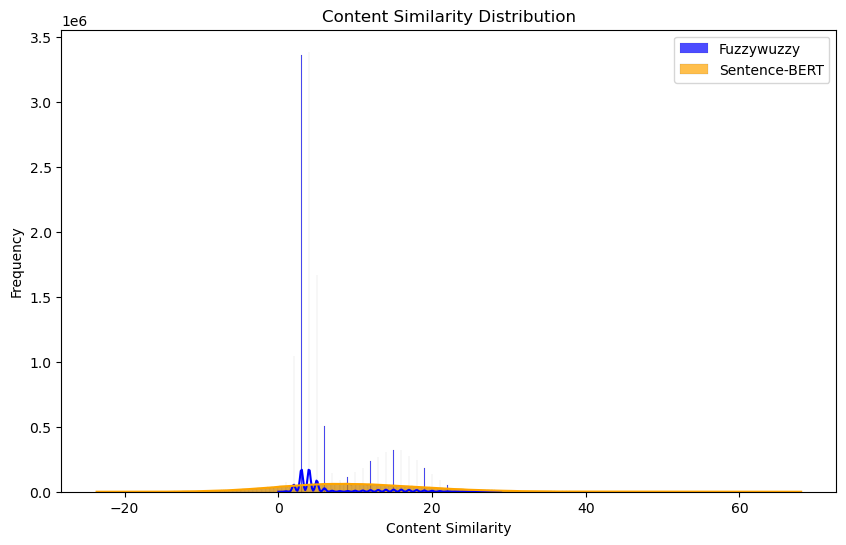

In [6]:
# Visualization: Content similarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['content_similarity_fuzzy'], kde=True, label='Fuzzywuzzy', color='blue', alpha=0.7)
sns.histplot(merged_df['content_similarity_bert'], kde=True, label='Sentence-BERT', color='orange', alpha=0.7)
plt.title('Content Similarity Distribution')
plt.xlabel('Content Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("content_similarity_distribution.png")
plt.show()



Shortened Labels (A, B, C, ...) and their corresponding full names:
A: [('Korean', 'NORP'), ('Ilmiri Geumgye Jjimdak', 'PERSON'), ('Vincenzo', 'PRODUCT'), ('200', 'CARDINAL'), ('Korea', 'GPE'), ('first', 'ORDINAL'), ('Singapore', 'GPE'), ('Sep 18', 'DATE'), ('three', 'CARDINAL'), ('Ilmiri', 'NORP'), ('Korea', 'GPE'), ('Singapore', 'GPE'), ('Ilmiri Korean Fusion Cuisine', 'ORG'), ('Ilmiri Singapore', 'ORG'), ('Jessie Choi', 'PERSON'), ('Singapore', 'GPE'), ('Ilmiri', 'NORP'), ('Singapore', 'GPE'), ('85', 'CARDINAL'), ('Boat Quay', 'LOC'), ('Singapore', 'GPE'), ('first', 'ORDINAL'), ('Korean', 'NORP'), ('Andong', 'GPE'), ('Korean', 'NORP'), ('Andong', 'GPE')]
B: [('three', 'CARDINAL'), ('Ilmiri', 'NORP'), ('Korea', 'GPE'), ('Singapore', 'GPE'), ('Ilmiri Korean Fusion Cuisine', 'ORG'), ('Ilmiri Singapore', 'ORG'), ('Jessie Choi', 'PERSON'), ('Singapore', 'GPE'), ('Ilmiri', 'NORP'), ('Singapore', 'GPE'), ('85', 'CARDINAL'), ('Boat Quay', 'LOC'), ('Singapore', 'GPE'), ('first', 'ORDINAL'), 

/var/folders/4z/7zn1mj8s7t747c4bbyygl8rh0000gn/T/ipykernel_53586/4018826391.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=6.0)  # Add padding to avoid cutting off labels


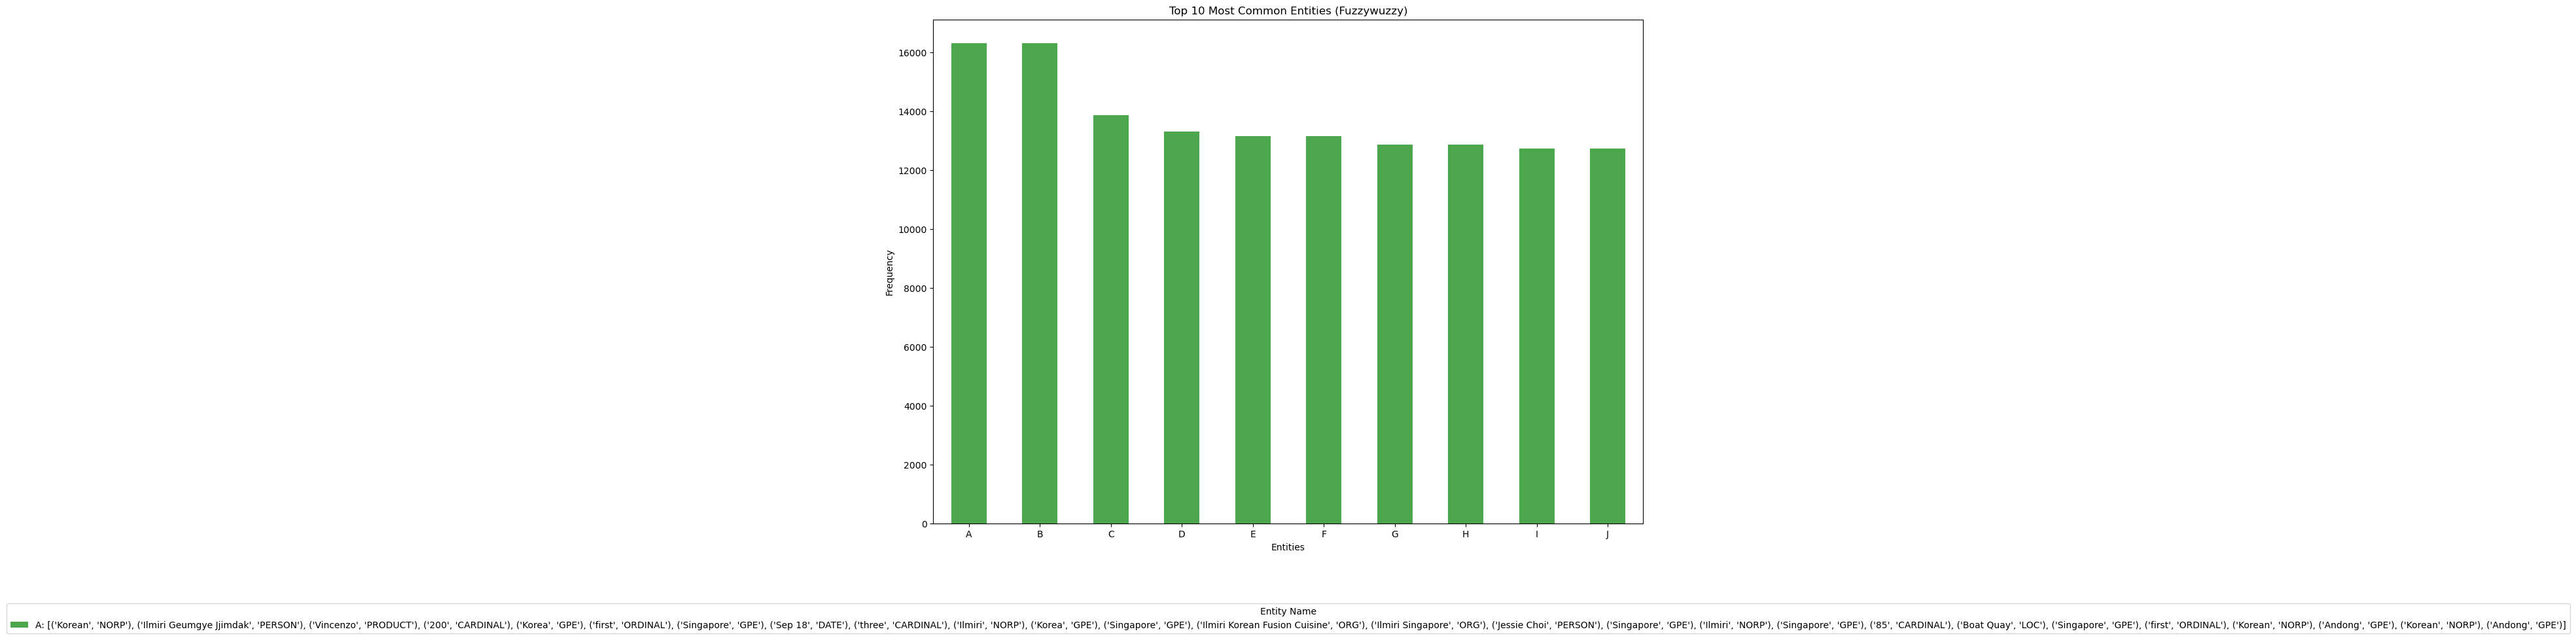


Shortened Labels (A, B, C, ...) and their corresponding full names:
A: [('three', 'CARDINAL'), ('Ilmiri', 'NORP'), ('Korea', 'GPE'), ('Singapore', 'GPE'), ('Ilmiri Korean Fusion Cuisine', 'ORG'), ('Ilmiri Singapore', 'ORG'), ('Jessie Choi', 'PERSON'), ('Singapore', 'GPE'), ('Ilmiri', 'NORP'), ('Singapore', 'GPE'), ('85', 'CARDINAL'), ('Boat Quay', 'LOC'), ('Singapore', 'GPE'), ('first', 'ORDINAL'), ('Korean', 'NORP'), ('Andong', 'GPE'), ('Korean', 'NORP'), ('Andong', 'GPE')]
B: [('Korean', 'NORP'), ('Ilmiri Geumgye Jjimdak', 'PERSON'), ('Vincenzo', 'PRODUCT'), ('200', 'CARDINAL'), ('Korea', 'GPE'), ('first', 'ORDINAL'), ('Singapore', 'GPE'), ('Sep 18', 'DATE'), ('three', 'CARDINAL'), ('Ilmiri', 'NORP'), ('Korea', 'GPE'), ('Singapore', 'GPE'), ('Ilmiri Korean Fusion Cuisine', 'ORG'), ('Ilmiri Singapore', 'ORG'), ('Jessie Choi', 'PERSON'), ('Singapore', 'GPE'), ('Ilmiri', 'NORP'), ('Singapore', 'GPE'), ('85', 'CARDINAL'), ('Boat Quay', 'LOC'), ('Singapore', 'GPE'), ('first', 'ORDINAL'),

/var/folders/4z/7zn1mj8s7t747c4bbyygl8rh0000gn/T/ipykernel_53586/4018826391.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(pad=6.0)  # Add padding to avoid cutting off labels


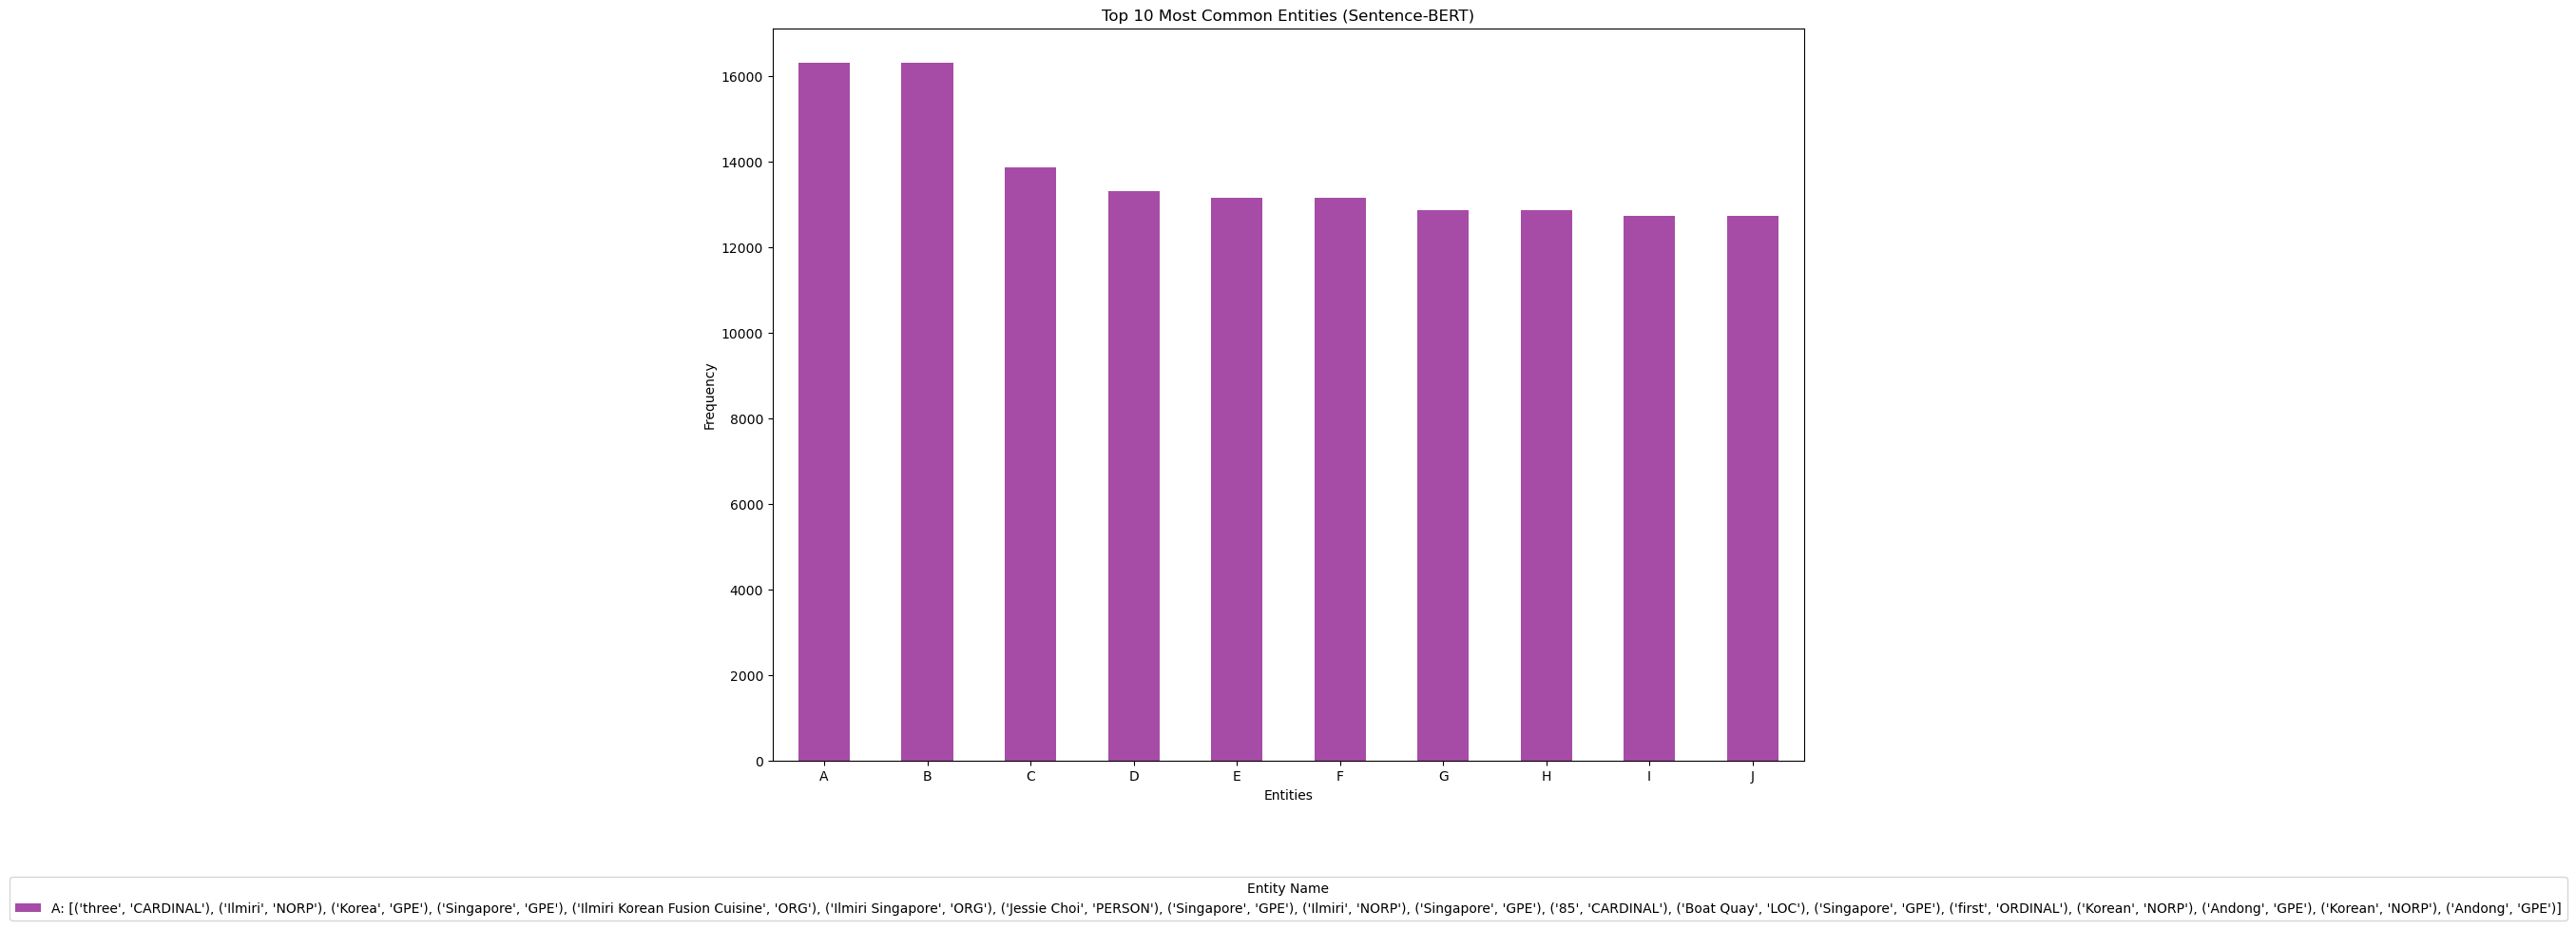

In [20]:
import string
import matplotlib.pyplot as plt

# Generate shortened labels (A, B, C, ...)
short_labels = list(string.ascii_uppercase[:len(most_common_entities_fuzzy)])

# Plot for Fuzzywuzzy
plt.figure(figsize=(14, 10))  # Increased figure size for better spacing
most_common_entities_fuzzy.plot(kind='bar', color='green', alpha=0.7, label='Fuzzywuzzy')
plt.title('Top 10 Most Common Entities (Fuzzywuzzy)')
plt.xlabel('Entities')
plt.ylabel('Frequency')

# Create a legend to map labels back to full entity names
legend_labels = {label: most_common_entities_fuzzy.index[i] for i, label in enumerate(short_labels)}
plt.legend(title="Entity Name", labels=[f"{k}: {v}" for k, v in legend_labels.items()],
           loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=5)  # Move legend to bottom

# Print the shortened labels with their corresponding full entity names
print("Shortened Labels (A, B, C, ...) and their corresponding full names:")
for short, full in legend_labels.items():
    print(f"{short}: {full}")

# Set the x-ticks to show only the shortened labels (A, B, C, etc.)
plt.xticks(ticks=range(len(most_common_entities_fuzzy)), labels=short_labels, rotation=0)

# Adjust layout to avoid overlap
plt.tight_layout(pad=6.0)  # Add padding to avoid cutting off labels
plt.savefig("common_entities_fuzzy.png")
plt.show()

# Plot for Sentence-BERT
plt.figure(figsize=(14, 10))  # Increased figure size for better spacing
most_common_entities_bert.plot(kind='bar', color='purple', alpha=0.7, label='Sentence-BERT')
plt.title('Top 10 Most Common Entities (Sentence-BERT)')
plt.xlabel('Entities')
plt.ylabel('Frequency')

# Create a legend to map labels back to full entity names
legend_labels = {label: most_common_entities_bert.index[i] for i, label in enumerate(short_labels)}
plt.legend(title="Entity Name", labels=[f"{k}: {v}" for k, v in legend_labels.items()],
           loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=5)  # Move legend to bottom

# Print the shortened labels with their corresponding full entity names
print("\nShortened Labels (A, B, C, ...) and their corresponding full names:")
for short, full in legend_labels.items():
    print(f"{short}: {full}")

# Set the x-ticks to show only the shortened labels (A, B, C, etc.)
plt.xticks(ticks=range(len(most_common_entities_bert)), labels=short_labels, rotation=0)

# Adjust layout to avoid overlap
plt.tight_layout(pad=6.0)  # Add padding to avoid cutting off labels
plt.savefig("common_entities_bert.png")
plt.show()


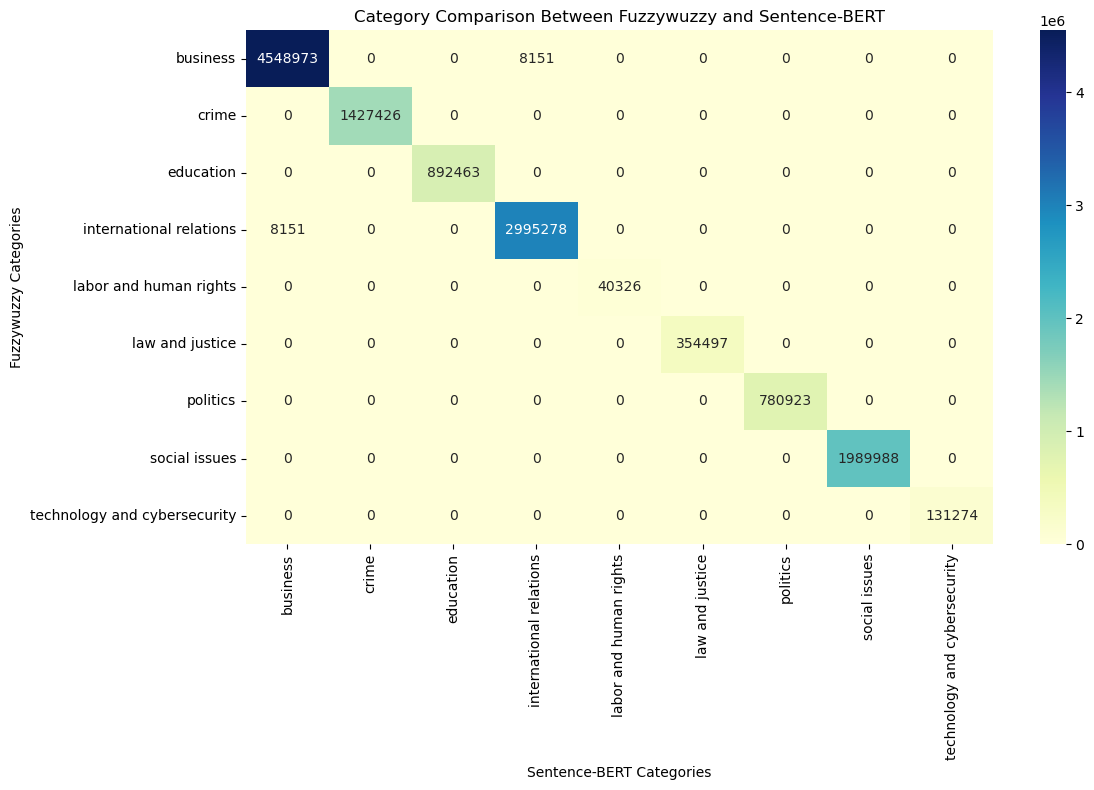

In [8]:
# Visualization: Category comparison as a heatmap
category_comparison = category_comparison.unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(category_comparison, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Category Comparison Between Fuzzywuzzy and Sentence-BERT')
plt.xlabel('Sentence-BERT Categories')
plt.ylabel('Fuzzywuzzy Categories')
plt.tight_layout()
plt.savefig("category_comparison_heatmap.png")
plt.show()



In [9]:
# Summary insights
print("Content Similarity Statistics:\n", similarity_stats)
print("\nTop 10 Most Common Entities (Fuzzywuzzy):\n", most_common_entities_fuzzy)
print("\nTop 10 Most Common Entities (Sentence-BERT):\n", most_common_entities_bert)


Content Similarity Statistics:
        content_similarity_fuzzy  content_similarity_bert
count              1.317745e+07             1.317745e+07
mean               6.302941e+00             9.959247e+00
std                5.093827e+00             9.218660e+00
min                0.000000e+00            -2.365034e+01
25%                3.000000e+00             3.507277e+00
50%                4.000000e+00             9.447069e+00
75%                6.000000e+00             1.587916e+01
max                2.900000e+01             6.804148e+01

Top 10 Most Common Entities (Fuzzywuzzy):
 news_entities_fuzzy
[('Korean', 'NORP'), ('Ilmiri Geumgye Jjimdak', 'PERSON'), ('Vincenzo', 'PRODUCT'), ('200', 'CARDINAL'), ('Korea', 'GPE'), ('first', 'ORDINAL'), ('Singapore', 'GPE'), ('Sep 18', 'DATE'), ('three', 'CARDINAL'), ('Ilmiri', 'NORP'), ('Korea', 'GPE'), ('Singapore', 'GPE'), ('Ilmiri Korean Fusion Cuisine', 'ORG'), ('Ilmiri Singapore', 'ORG'), ('Jessie Choi', 'PERSON'), ('Singapore', 'GPE'), ('